In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import os

plt.style.use("ggplot")
plt.rcParams["axes.titleweight"] = "bold"
plt.rcParams["figure.titleweight"] = "bold"
plt.rcParams["figure.dpi"] = 300

data_path = "../data/"
image_path = "../img/"


## Load and Organize Data to Categories

In [2]:
model_data = pd.read_csv(os.path.join(data_path, "model_data.csv"), 
                         index_col=["Country", "Year"])

In [3]:
# g7 and dev7 countries will be modelled separately
g7_countries = ["Canada", "Japan", "France", "Germany", 
                "Italy", "United States", "United Kingdom"]
dev7_countries = ["China", "India", "Indonesia", "Brazil", 
                  "Iran", "Mexico", "South Africa"]

g7_df = model_data.loc[g7_countries]
dev7_df = model_data.loc[dev7_countries]

## General Information

We first take a look at what data types, columns, and non-values we have before moving on to statistics and other EDA tasks.

In [4]:
g7_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 203 entries, ('Canada', 1990) to ('United Kingdom', 2018)
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ghg_mtco2              203 non-null    float64
 1   ghg_pergdp             203 non-null    float64
 2   gdp_percapita          196 non-null    float64
 3   population             203 non-null    float64
 4   fossilfuels_percapita  203 non-null    float64
 5   nuclear_percapita      203 non-null    float64
 6   renewables_percapita   203 non-null    float64
 7   yearly_oil_co2         203 non-null    float64
 8   yearly_gas_co2         203 non-null    float64
 9   yearly_flaring_co2     203 non-null    float64
 10  yearly_coal_co2        203 non-null    float64
 11  yearly_cement_co2      203 non-null    float64
dtypes: float64(12)
memory usage: 21.5+ KB


In [5]:
dev7_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 203 entries, ('China', 1990) to ('South Africa', 2018)
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ghg_mtco2              203 non-null    float64
 1   ghg_pergdp             201 non-null    float64
 2   gdp_percapita          203 non-null    float64
 3   population             203 non-null    float64
 4   fossilfuels_percapita  203 non-null    float64
 5   nuclear_percapita      203 non-null    float64
 6   renewables_percapita   203 non-null    float64
 7   yearly_oil_co2         203 non-null    float64
 8   yearly_gas_co2         203 non-null    float64
 9   yearly_flaring_co2     144 non-null    float64
 10  yearly_coal_co2        203 non-null    float64
 11  yearly_cement_co2      203 non-null    float64
dtypes: float64(12)
memory usage: 21.5+ KB


We can observe that there are missing values for G7 `gdp_percapita`, and a lot more for Dev-7 `cumulative_flaring_co2`.  

## Summary Statistics

In [6]:
g7_df.describe().T

count          mean           std           min  \
ghg_mtco2              203.0  1.488478e+03  1.856895e+03  3.613700e+02   
ghg_pergdp             203.0  4.139257e+02  2.603125e+02  1.272900e+02   
gdp_percapita          196.0  4.284030e+12  4.531970e+12  9.337452e+11   
population             203.0  1.019763e+08  8.261746e+07  2.769114e+07   
fossilfuels_percapita  203.0  4.574721e+04  1.875469e+04  2.125990e+04   
nuclear_percapita      203.0  6.459263e+03  5.398548e+03  0.000000e+00   
renewables_percapita   203.0  6.899776e+03  9.979512e+03  2.537050e+02   
yearly_oil_co2         203.0  5.889616e+02  7.213639e+02  1.488620e+02   
yearly_gas_co2         203.0  3.117238e+02  3.976139e+02  5.902500e+01   
yearly_flaring_co2     203.0  1.147823e+01  1.664954e+01  2.080000e-01   
yearly_coal_co2        203.0  4.368378e+02  6.295790e+02  3.289400e+01   
yearly_cement_co2      203.0  1.700316e+01  1.273799e+01  3.722000e+00   

                                25%           50%           75%           max  
ghg_mtco2              4.879850e+02  7.766100e+02  1.145570e+03  6.446200e+03  
ghg_pergdp             2.367050e+02  3.310600e+02  4.771450e+02  1.306900e+03  
gdp_percapita          1.854795e+12  2.532210e+12  3.913850e+12  1.955198e+13  
population             5.808150e+07  6.460230e+07  1.259070e+08  3.268382e+08  
fossilfuels_percapita  3.134315e+04  3.916519e+04  6.778680e+04  8.244003e+04  
nuclear_percapita      2.862133e+03  5.802110e+03  7.444745e+03  2.002523e+04  
renewables_percapita   2.191383e+03  3.244492e+03  4.572962e+03  3.415303e+04  
yearly_oil_co2         2.183725e+02  2.598700e+02  5.315925e+02  2.608477e+03  
yearly_gas_co2         1.306900e+02  1.658040e+02  2.044340e+02  1.641041e+03  
yearly_flaring_co2     2.664500e+00  4.124000e+00  1.461500e+01  1.192250e+02  
yearly_coal_co2        6.661900e+01  1.477470e+02  4.032805e+02  2.214838e+03  
yearly_cement_co2      6.916500e+00  1.290400e+01  2.630600e+01  4.685000e+01

In [7]:
dev7_df.describe().T

count          mean           std           min  \
ghg_mtco2              203.0  1.941223e+03  2.447332e+03  2.405400e+02   
ghg_pergdp             201.0  2.696039e+03  2.228311e+03  4.856600e+02   
gdp_percapita          203.0  1.425761e+12  2.224017e+12  1.639283e+11   
population             203.0  4.335982e+08  4.976083e+08  3.680051e+07   
fossilfuels_percapita  203.0  1.428025e+04  9.455138e+03  2.388118e+03   
nuclear_percapita      203.0  1.778668e+02  2.296133e+02  0.000000e+00   
renewables_percapita   203.0  1.257929e+03  1.888422e+03  1.023300e+01   
yearly_oil_co2         203.0  3.032812e+02  2.770682e+02  2.244900e+01   
yearly_gas_co2         203.0  8.984206e+01  9.586478e+01  2.470000e+00   
yearly_flaring_co2     144.0  1.275395e+01  1.170005e+01  1.575000e+00   
yearly_coal_co2        203.0  8.370054e+02  1.722519e+03  2.693000e+00   
yearly_cement_co2      203.0  7.979142e+01  1.695233e+02  3.429000e+00   

                                25%           50%           75%           max  
ghg_mtco2              5.190150e+02  1.257100e+03  1.995205e+03  1.170581e+04  
ghg_pergdp             1.292610e+03  2.040990e+03  3.349580e+03  1.439104e+04  
gdp_percapita          3.595453e+11  8.127798e+11  1.319212e+12  1.349342e+13  
population             7.508742e+07  1.818092e+08  9.916326e+08  1.392730e+09  
fossilfuels_percapita  6.333702e+03  1.313234e+04  2.195555e+04  3.960650e+04  
nuclear_percapita      0.000000e+00  7.175300e+01  2.322220e+02  8.649010e+02  
renewables_percapita   2.121570e+02  3.930230e+02  1.027886e+03  7.046457e+03  
yearly_oil_co2         1.570545e+02  2.356420e+02  3.169675e+02  1.495472e+03  
yearly_gas_co2         3.332350e+01  6.031300e+01  1.131535e+02  5.198330e+02  
yearly_flaring_co2     3.855750e+00  9.618000e+00  1.750500e+01  7.621100e+01  
yearly_coal_co2        3.589800e+01  8.949000e+01  5.150445e+02  7.493455e+03  
yearly_cement_co2      1.086500e+01  1.796000e+01  3.612350e+01  7.867450e+02

We can see that for both G7 and Dev-7, the **scales for the different features differ**, most especially the GDP per Capita.

## Distributions

We take a look at the differences, if any, of the features between G7 and Dev-7 countries. This will help us in getting a intuition with the data that we have, and the underlying differences between the two data groups that we have.

In [8]:
# create temporary data for distribution plots 
distrib_data = model_data.copy(deep=True)
distrib_data["Category"] = np.nan
distrib_data["Category"].loc[g7_countries] = "G7"
distrib_data["Category"].loc[dev7_countries] = "Dev-7"

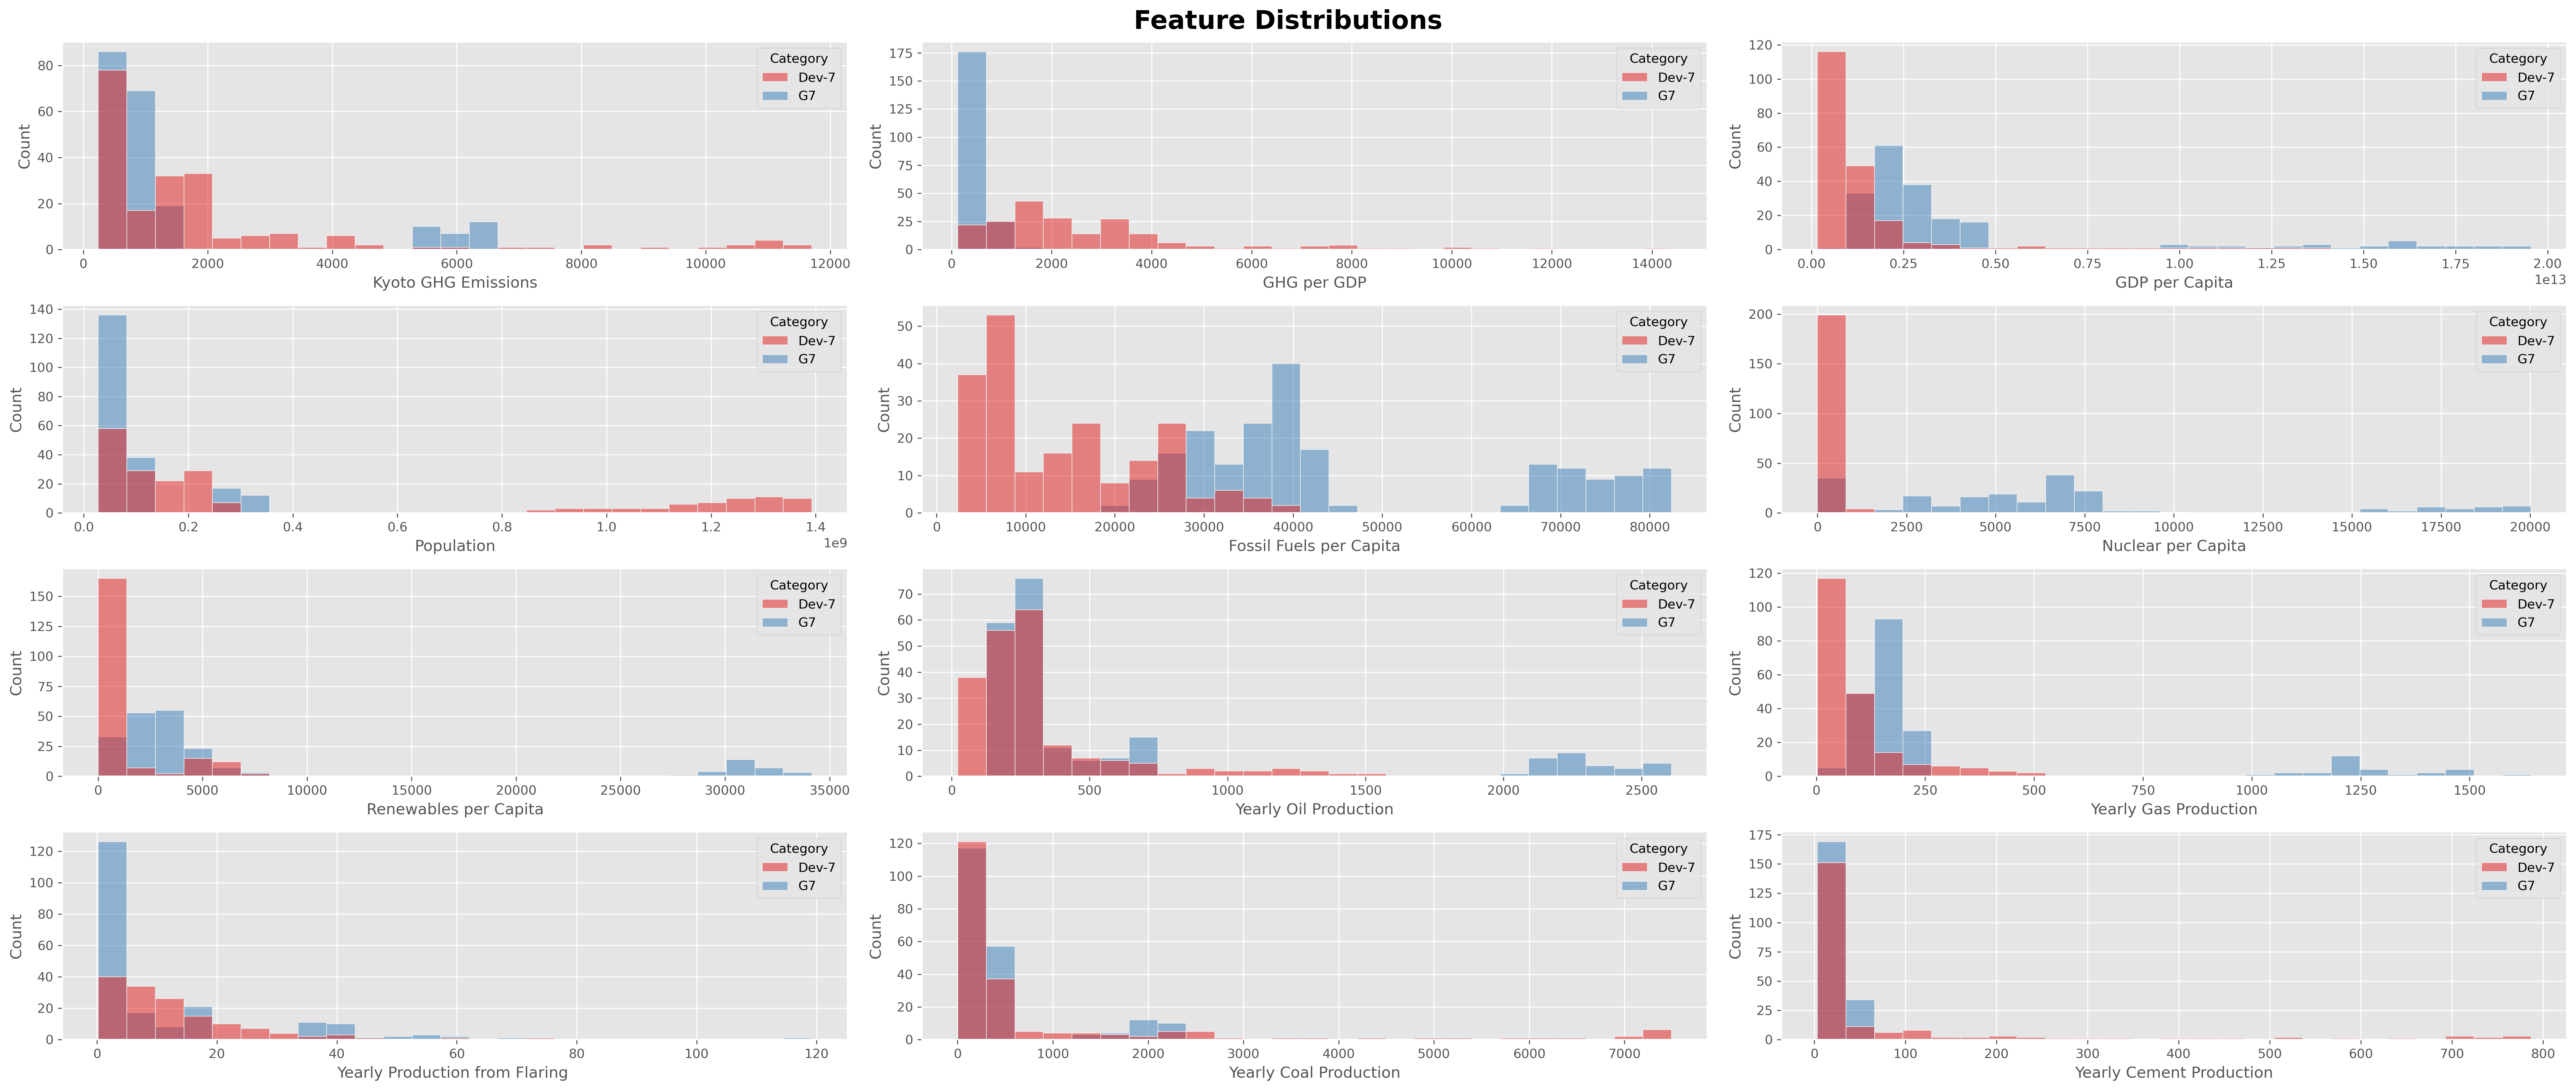

In [9]:
def plot_distribs(data, features, hue, labels):
    fig, ax = plt.subplots(4, 3, figsize=(28,12))
    ax = ax.ravel()
    for i in range(len(features)):
        sns.histplot(data=data, x=features[i], hue=hue, 
                    ax=ax[i], palette="Set1", kde=False, 
                    bins=25)
        ax[i].set_xlabel(labels[i])
    fig.suptitle("Feature Distributions", fontsize=20)
    plt.tight_layout()
    fig.savefig(os.path.join(image_path, "feature_distribs.png"))
    plt.show()

# plot feature distributions for G7 and Dev-7        
feature_titles = ["Kyoto GHG Emissions", "GHG per GDP", "GDP per Capita", 
                  "Population", "Fossil Fuels per Capita", 
                  "Nuclear per Capita", "Renewables per Capita", 
                  "Yearly Oil Production", "Yearly Gas Production", 
                  "Yearly Production from Flaring ", "Yearly Coal Production", 
                  "Yearly Cement Production"] 
plot_distribs(distrib_data, model_data.columns, 
              "Category", feature_titles)       

We can observe thet in features such as `GHG per GDP` and `Fossil Fuels per Capita`, the difference in the distribution for Dev-7 and G7 countries differ significantly. We can also observe that most features follow a skewed distribution -- this might predicate that we need to conduct standardizing efforts so that outliers will be mitigated.

## Correlation

Now that we have seen the distribution of each feature that we will be working with, it is reasonable that we look at their correlation with each other. In this section, it also helps in paying attention to the correlation between our target feature (`ghg_mtco2`) and others.

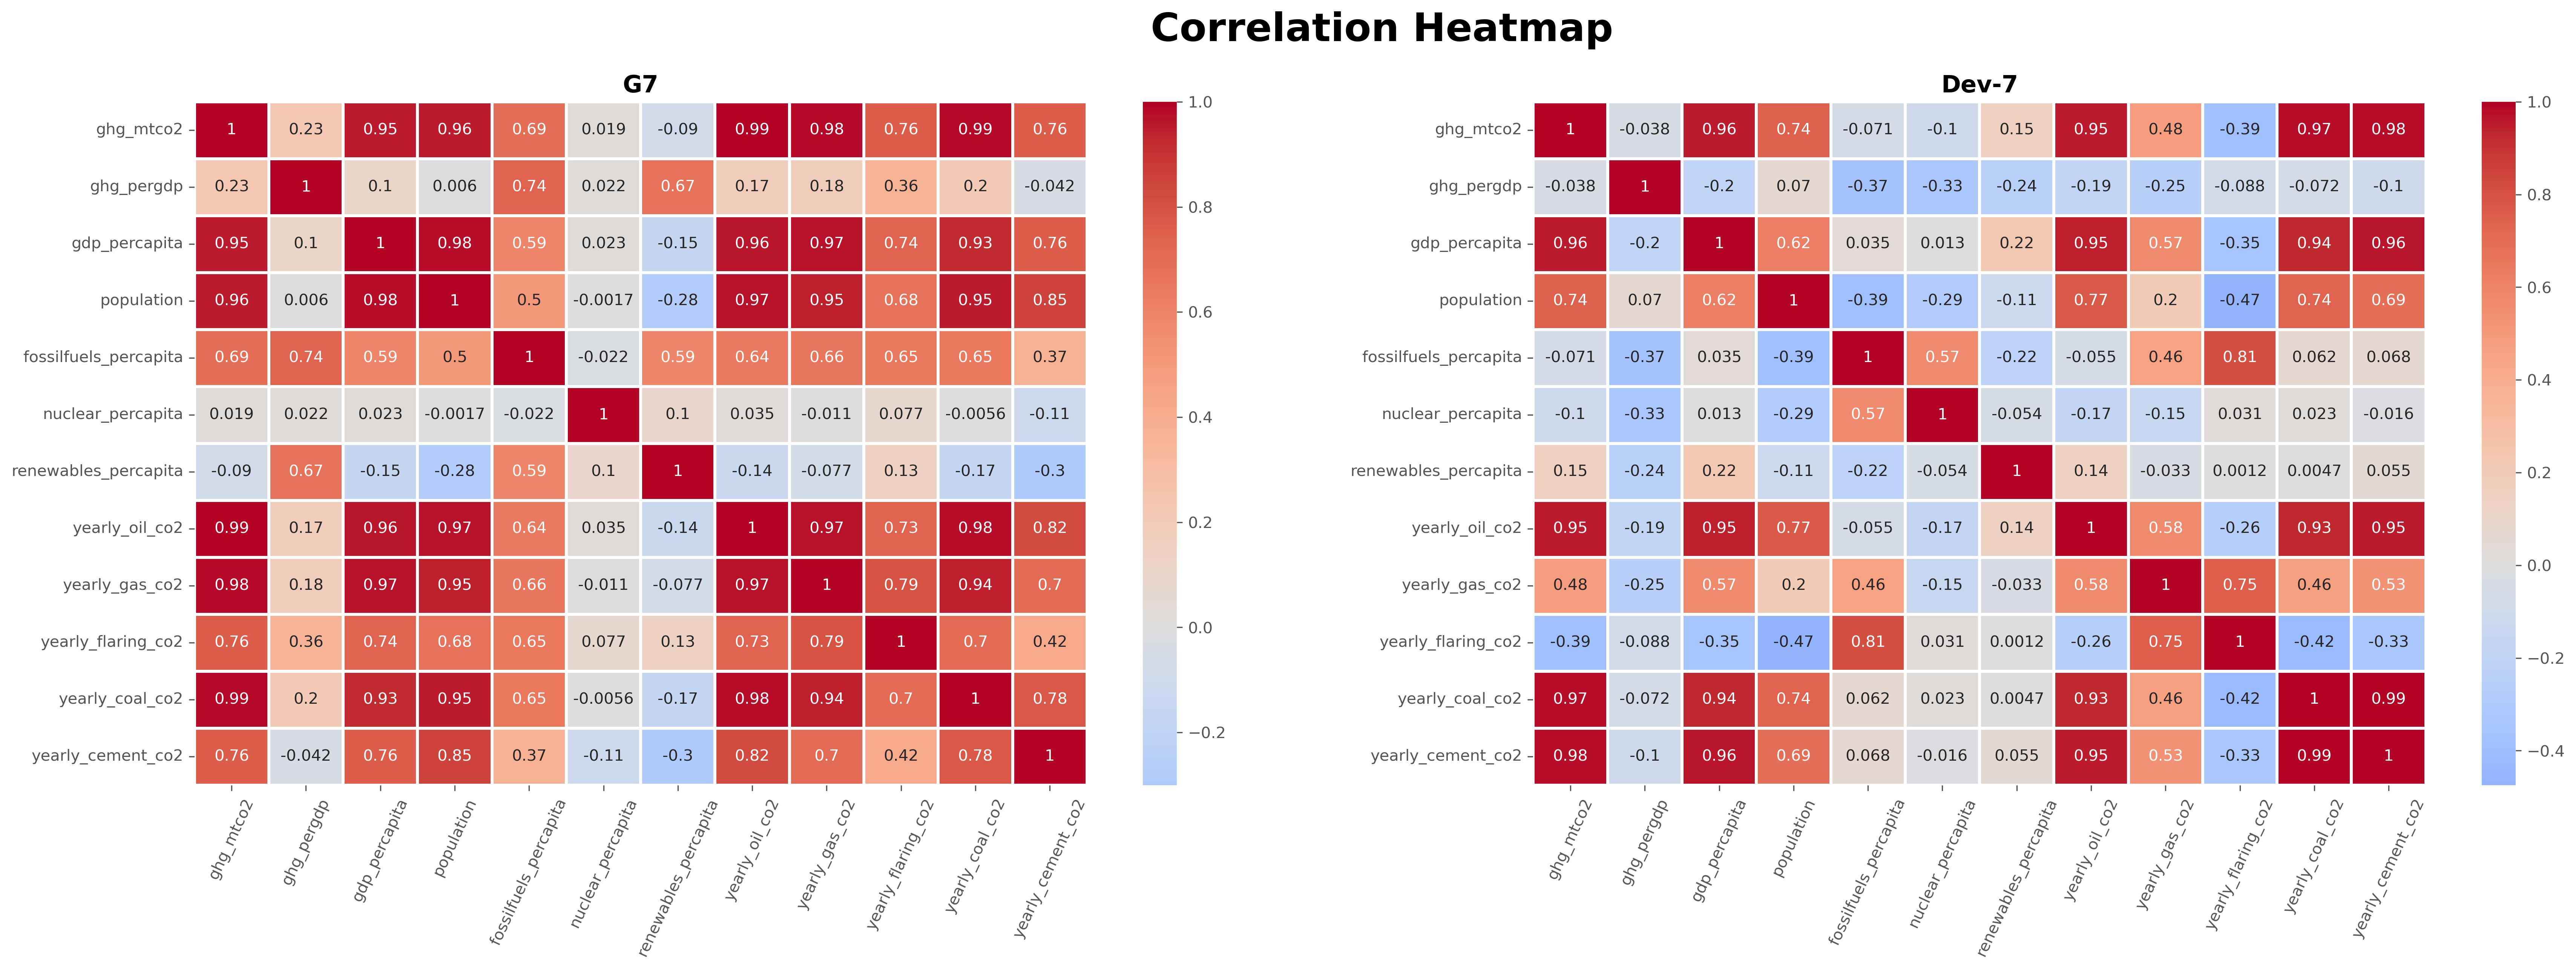

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(28, 8))

# maintain a diverging colormap 
# make Ms. Unisse proud
sns.heatmap(g7_df.corr(), annot=True, center=0, 
            linewidths=1.5, cmap="coolwarm", ax=ax1)
sns.heatmap(dev7_df.corr(), annot=True, center=0, 
            linewidths=1.5, cmap="coolwarm", ax=ax2)

ax1.tick_params(axis="x", rotation=65)
ax2.tick_params(axis="x", rotation=65)
ax1.set_title("G7", fontsize=15)
ax2.set_title("Dev-7", fontsize=15)

fig.suptitle("Correlation Heatmap", fontsize=25)
fig.savefig(os.path.join(image_path, "correlation.png"))

plt.show()

From the correlation heatmaps, we can observe that the correlation of the target variable `ghg_mtco2` to its independent features differ for G7 and Dev-7 countries. For example, in G7, almost all features except of `renewable_percapita` and `nuclear_percapita` are highly correlated, while for Dev-7 countries, most are not. 

These plots further emphasize how the two data groups differ, and makes the case for separate modelling.

## Quantitative-Quantitative Analysis 

In the previous section, we investigated the correlation of each feature to one another. For our Q-Q analysis, let us focus on the relationship of each feature to the target variable `ghg_mtco2`. This gives us further insight on how each variable affects our target feature, and how these effects differ per data group.

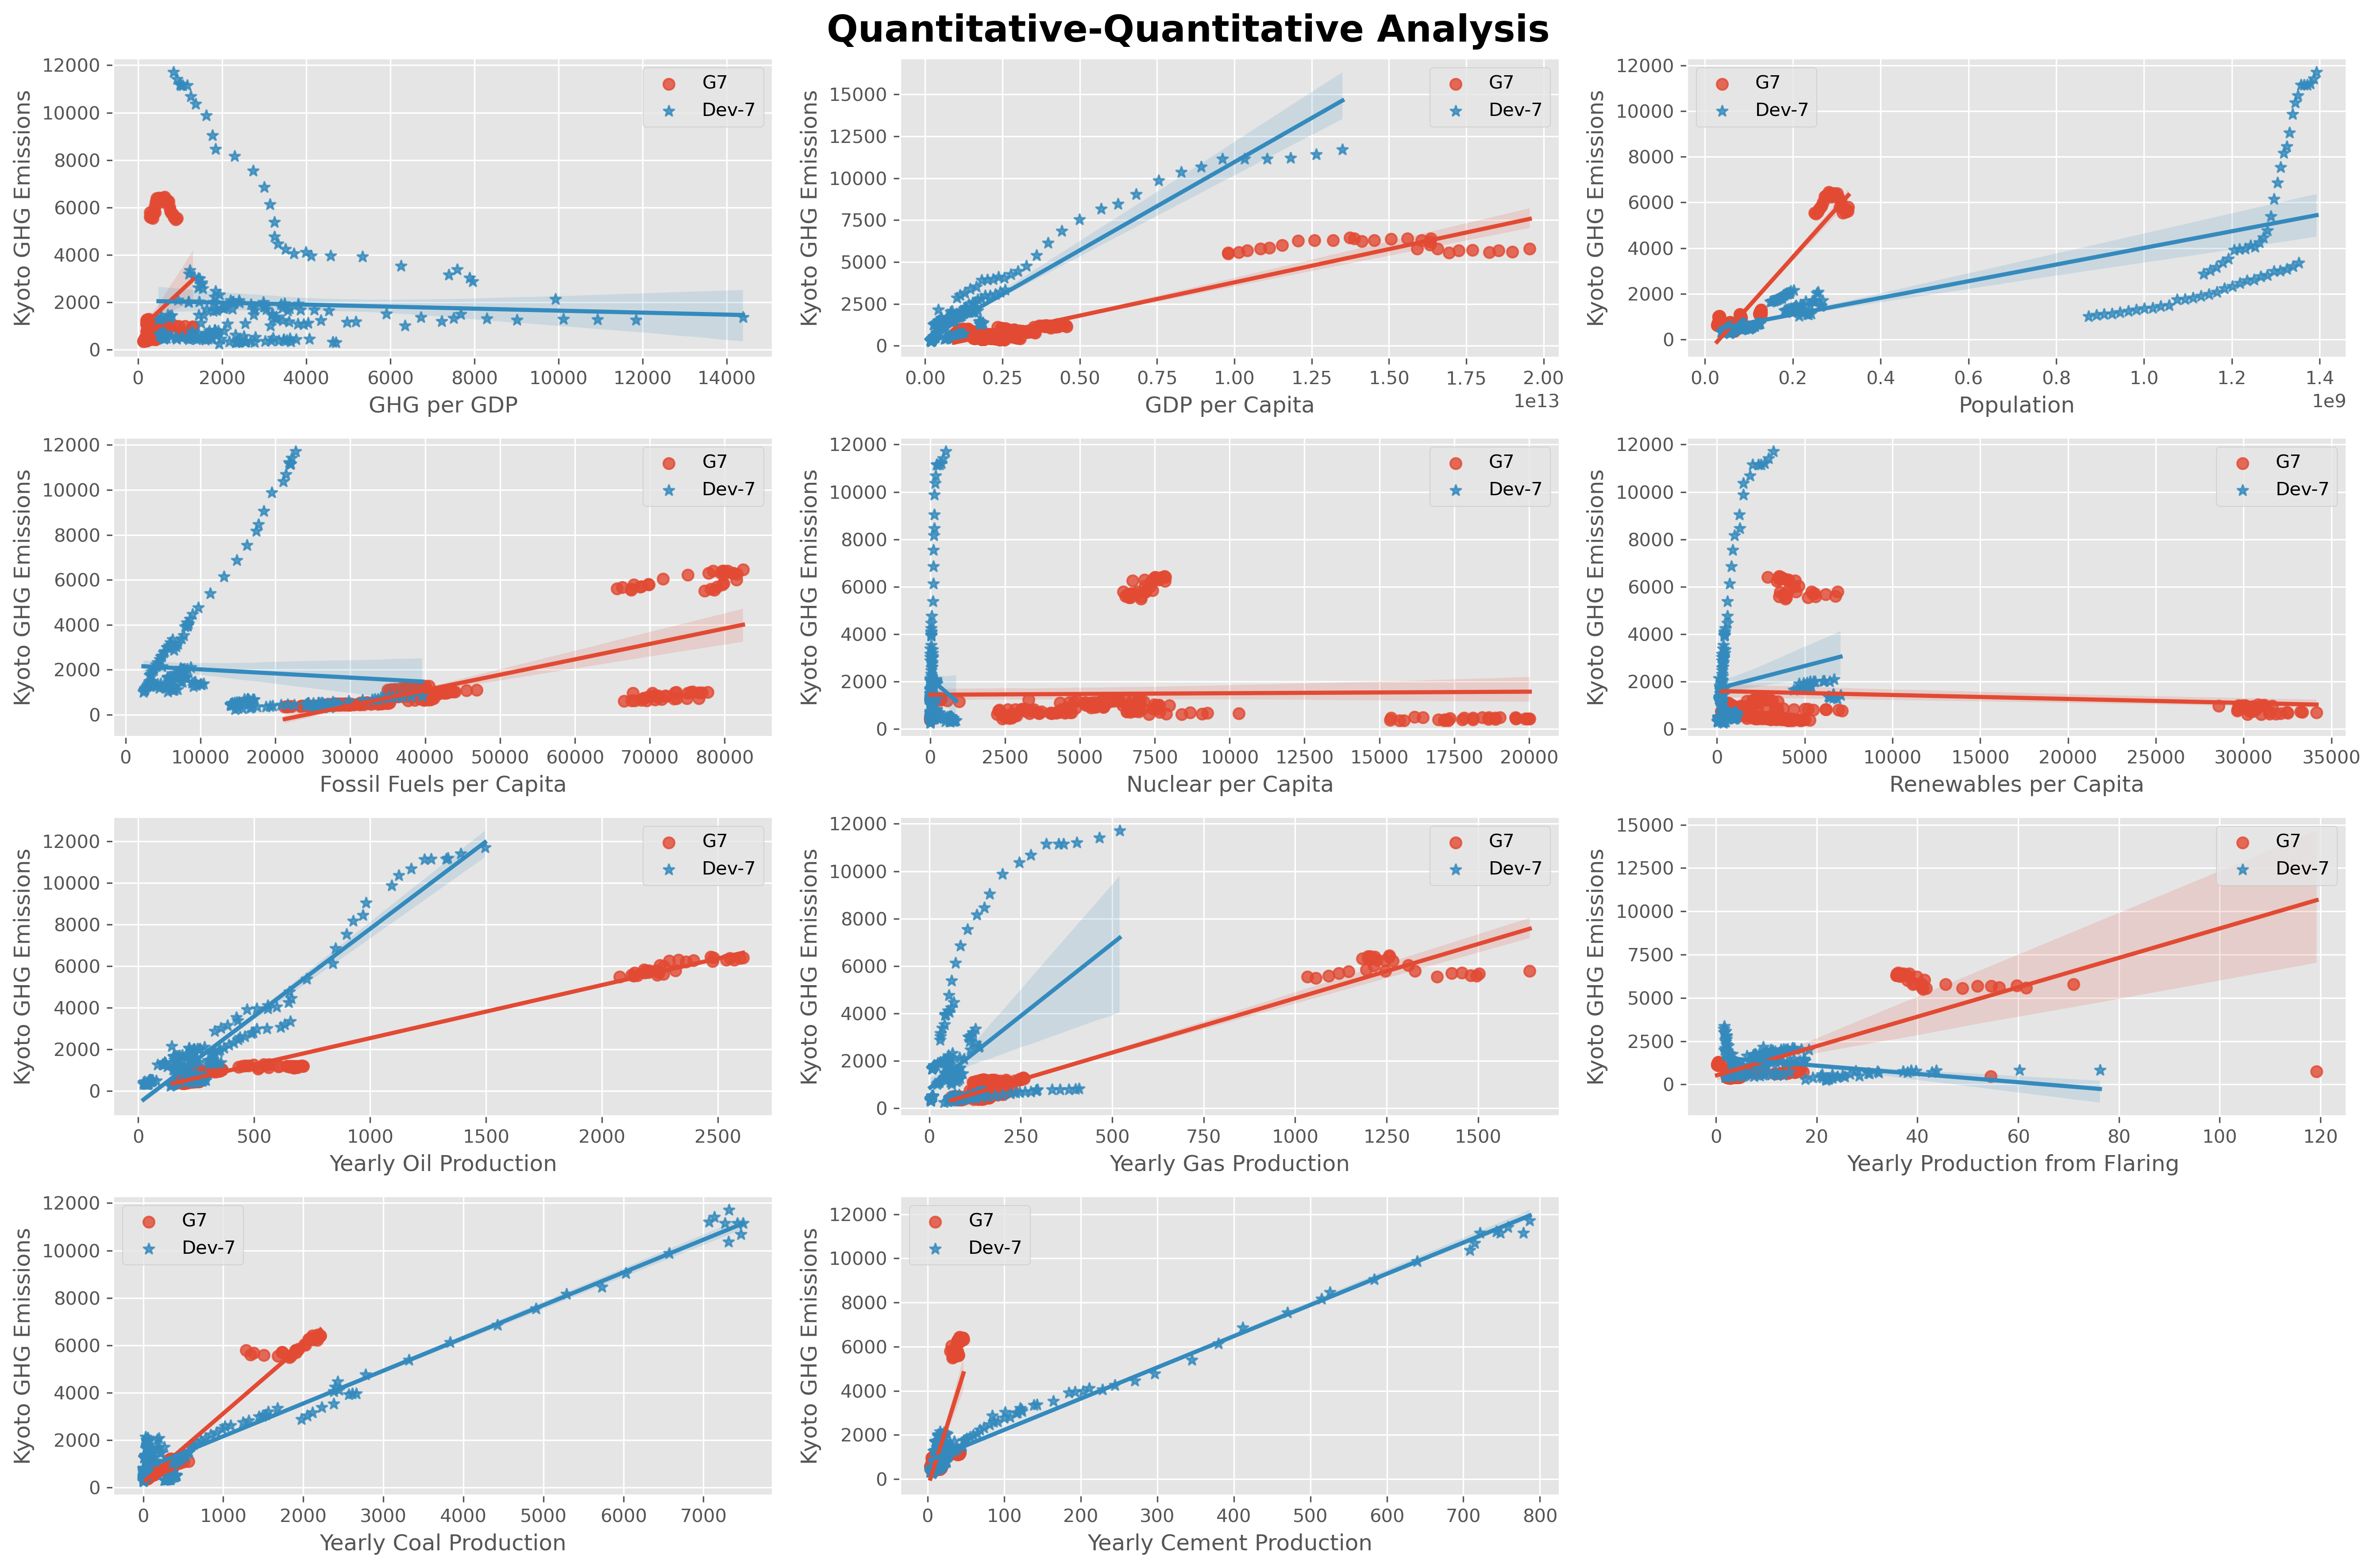

In [11]:
def plot_qq(g7_df, dev7_df, 
            features, target, 
            labels, target_label, 
            suptitle):
    fig, ax = plt.subplots(4, 3, figsize=(18, 12))
    fig.delaxes(ax[-1, -1])
    ax = ax.ravel()
    for i in range(len(features)):
        sns.regplot(data=g7_df, x=features[i], 
                    y=target, ax=ax[i], marker="o",
                    label="G7")
        sns.regplot(data=dev7_df, x=features[i], 
                    y=target, ax=ax[i], marker="*",
                    label="Dev-7")
        ax[i].set_xlabel(labels[i])
        ax[i].set_ylabel(target_label)
        ax[i].legend()
    fig.suptitle(suptitle, fontsize=20)
    plt.tight_layout()
    fig.savefig(os.path.join(image_path, "qq_analysis.png"))
    plt.show()
 
# init variables for q-q analysis
feature_cols = model_data.columns[1:]
target_cols = model_data.columns[0]   
feature_names = feature_titles[1:]
target_name = feature_titles[0]

plot_qq(g7_df, dev7_df, 
        feature_cols, target_cols, 
        feature_names, target_name, 
        "Quantitative-Quantitative Analysis")

Similar to the correlation heatmap, we can observe that the relationship of each independent feature to the GHG Emissions differ for each data group. For example, for `GDP per Capita` the Dev7 slope is steeper than G7. This may imply that GDP earnings of Dev7 countries are not yet geared towards cleaner energy. 

## Categorical-Quantitative Analysis 

In this section, we simply look at the relationship of the target variable with the categorical ones, more specifically, the difference of Kyoto GHG Emissions for G7 and Dev-7 Countries. These were already compared in the *Distributions* section, but it's worth emphasizing to assess the difference.

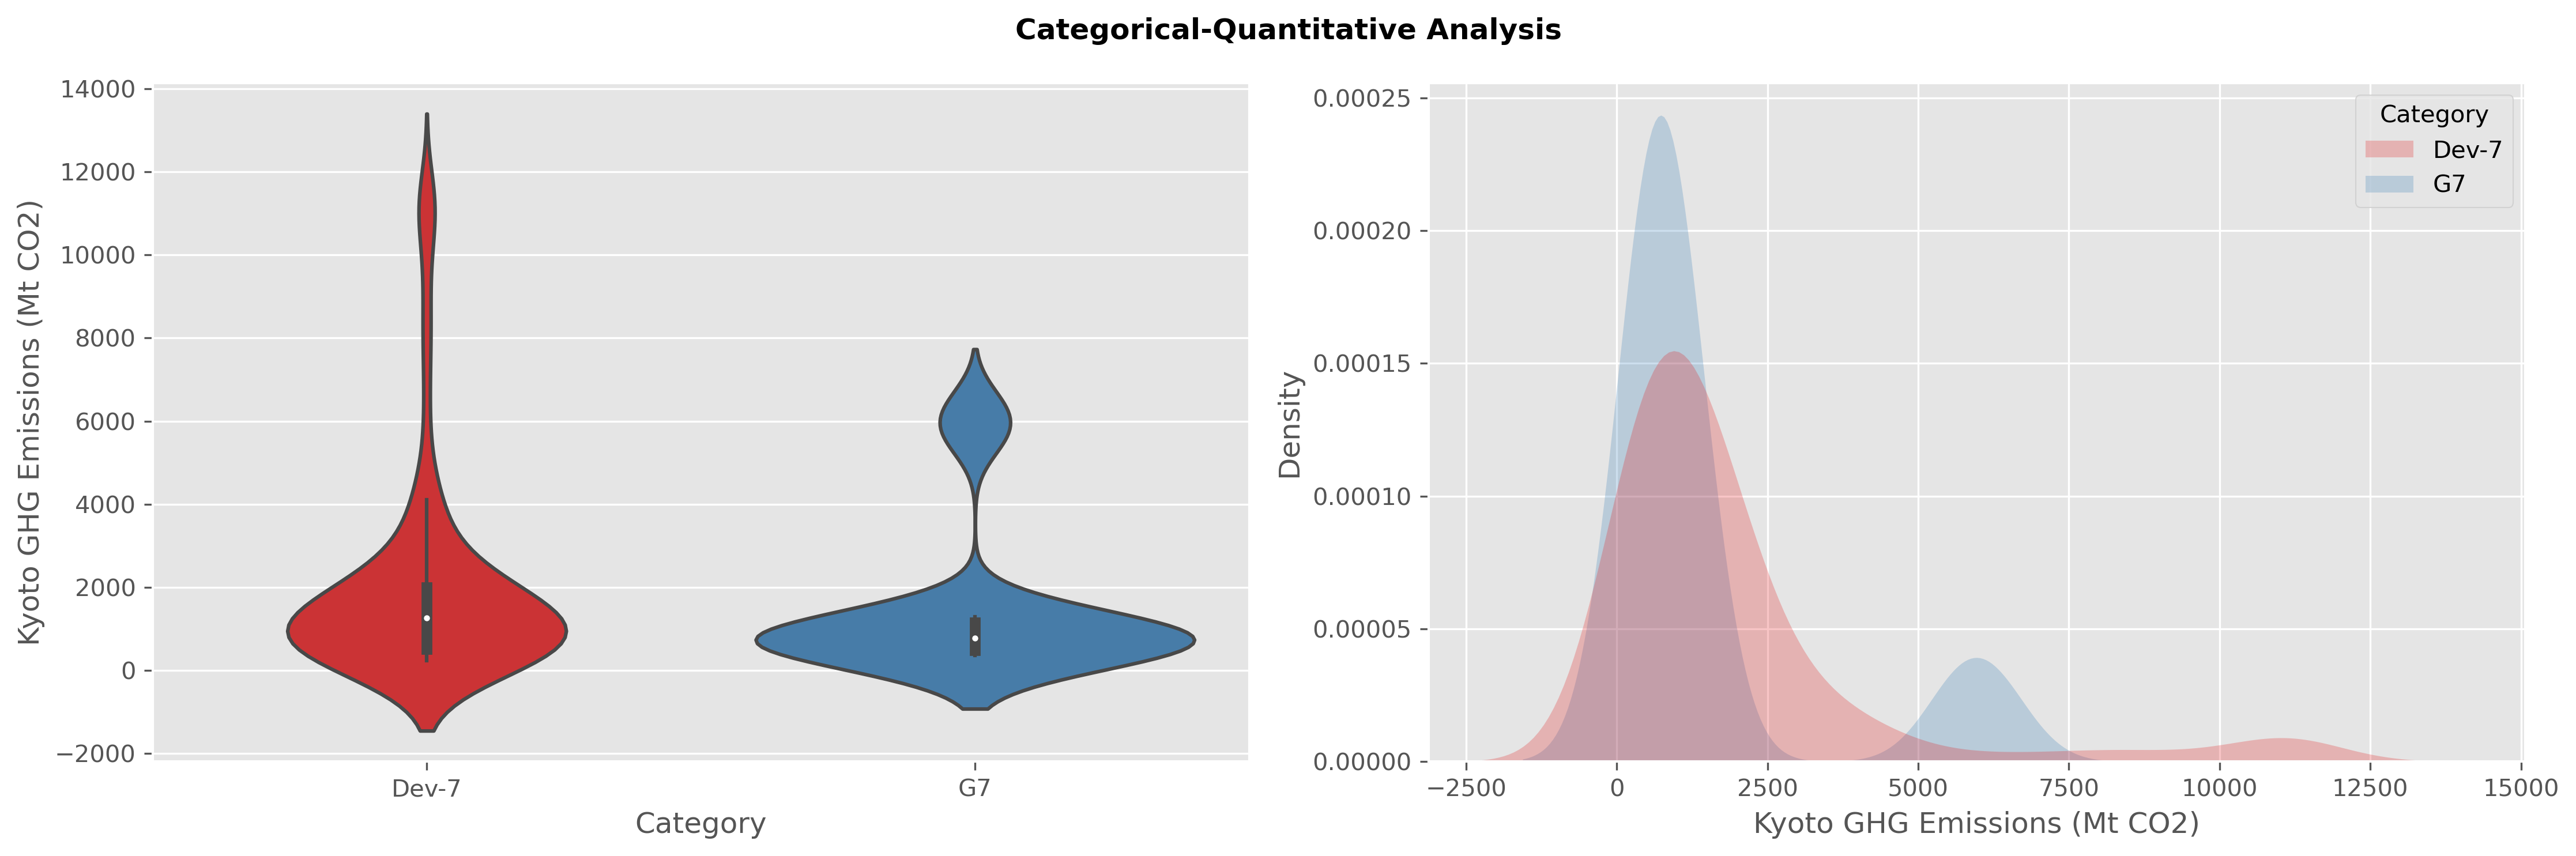

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

sns.violinplot(data=distrib_data, x="Category", y="ghg_mtco2", 
               ax=ax1, palette="Set1")
sns.kdeplot(data=distrib_data, x="ghg_mtco2", hue="Category",
            fill=True, ax=ax2, palette="Set1", linewidth=0)

ax1.set_ylabel("Kyoto GHG Emissions (Mt CO2)")
ax2.set_xlabel("Kyoto GHG Emissions (Mt CO2)")
fig.suptitle("Categorical-Quantitative Analysis")
plt.tight_layout()

fig.savefig(os.path.join(image_path, "cq_analysis.png"))
plt.show()

In this Categorical-Quantitative anlysis, we simply observe the difference in the distribution of the target variable for the two data groups. We can observe that Dev 7 countries vary more than G7 emissions. We can also see from the distributions that Dev-7 countries tend to have more emissions than the developed ones.

In [13]:
# save g7 and dev7 data for later use 
g7_df.to_csv(os.path.join(data_path, "g7_df.csv"))
dev7_df.to_csv(os.path.join(data_path, "dev7_df.csv"))

## Sources

[1] For the idea of Q-Q and C-Q Analysis: https://www.kaggle.com/ekami66/detailed-exploratory-data-analysis-with-python

In [14]:
%load_ext watermark

%watermark -v -iv 

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.28.0

numpy     : 1.20.3
matplotlib: 3.4.3
pandas    : 1.3.4
seaborn   : 0.11.2
sys       : 3.9.7 | packaged by conda-forge | (default, Sep 29 2021, 19:15:42) [MSC v.1916 64 bit (AMD64)]

